In [4]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.1 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 9.3 MB 65.2 MB/s 
     |████████████████████████████████| 140 kB 47.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [5]:
import os
import boto3
from botocore.handlers import disable_signing
import re 
import numpy as np
client = boto3.client('s3')
client.meta.events.register('choose-signer.s3.*', disable_signing)

PIOP1 cohort is in prefix ds002785

preprocessed data are in /derivatives folder

let's get all the task working memory fmri files for   individual sub-001

we can use paginator to research 'task-workingmemory' in the files
 
and a list generator to retrive the "Key" filed on the selected objects 

In [8]:
paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002790/derivatives/fmriprep/sub-0001/func/'}
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search("Contents[?Key.contains(@,'task-stopsignal')]")
task_list=[key_data['Key'] for key_data in filtered_iterator]

Now make a panda dataframe and split the file names 

We can use panda dataframes, split() functions  

and display it within a panda dataframe 

In [9]:
import pandas as pd
files=np.array(task_list)
filename_split = [x.split("/") for x in  files.tolist()]
pd_filename_list=  pd.DataFrame( filename_split)[5]
pd.DataFrame([y.split("_") for y in  pd_filename_list ])

,0,1,2,3,4,5
0,sub-0001,task-stopsignal,acq-seq,desc-confounds,regressors.json,None
1,sub-0001,task-stopsignal,acq-seq,desc-confounds,regressors.tsv,None
2,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,boldref.nii.gz,None
3,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
4,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
5,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.json
6,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
7,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.json
8,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
9,sub-0001,task-stopsignal,acq-seq,space-T1w,boldref.nii.gz,None


now list all the nii.gz files

we  can use 'endwith' function 

In [10]:
nii_task=np.array([x.endswith('nii.gz') for x in task_list]) 
nii_files=np.asarray(task_list)[nii_task]
pd.DataFrame([y.split("_") for y in pd.DataFrame([x.split("/") for x in  nii_files])[5] ])

,0,1,2,3,4,5
0,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,boldref.nii.gz,None
1,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
2,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
3,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
4,sub-0001,task-stopsignal,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
5,sub-0001,task-stopsignal,acq-seq,space-T1w,boldref.nii.gz,None
6,sub-0001,task-stopsignal,acq-seq,space-T1w,desc-aparcaseg,dseg.nii.gz
7,sub-0001,task-stopsignal,acq-seq,space-T1w,desc-aseg,dseg.nii.gz
8,sub-0001,task-stopsignal,acq-seq,space-T1w,desc-brain,mask.nii.gz
9,sub-0001,task-stopsignal,acq-seq,space-T1w,desc-preproc,bold.nii.gz


select the key for preprocessed workingmemory frmi volumes in MNI space

In [26]:
file_key= ... # choose the file you want in nii_list    

In [31]:
import os.path
if not  os.path.exists( "taskstop.nii.gz"): # if the image "taskstop.nii.gz" is not there yet
    client.download_file(....) #download it to "taskstop.nii.gz"

Now we do the same to find the event .tsv file for the same individual


In [42]:
 paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002790/sub-0001/func/sub-0001_task-stopsignal'} 
                        #we have all the task files here
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search(...) # we want the file that contains "events"
event_list= # we make the file list by getting 'Key'field 
 

In [ ]:
 # there should be only one file
if not  os.path.exists( "taskstop.events.tsv"): #if teh .tsv file does not existe yet   
    client.download_file(...) # download it

In [48]:

pd_events=pd.read_csv("taskstop.event.tsv", sep="\t")
pd_events.head()

,onset,duration,trial_type,stop_signal_delay,response_time,response_accuracy,response_hand,sex
0,0.0844,0.5084,go,NaN,0.914,correct,left,male
1,8.5926,0.5083,go,NaN,0.919,correct,right,female
2,13.6008,0.5083,succesful_stop,0.2,NaN,NaN,right,female
3,16.1174,0.5083,go,NaN,0.828,correct,right,female
4,20.6172,0.5084,go,NaN,0.690,correct,right,female


In [32]:
! pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from nilearn import plotting
from nilearn import image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(65, 77, 60, 228)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



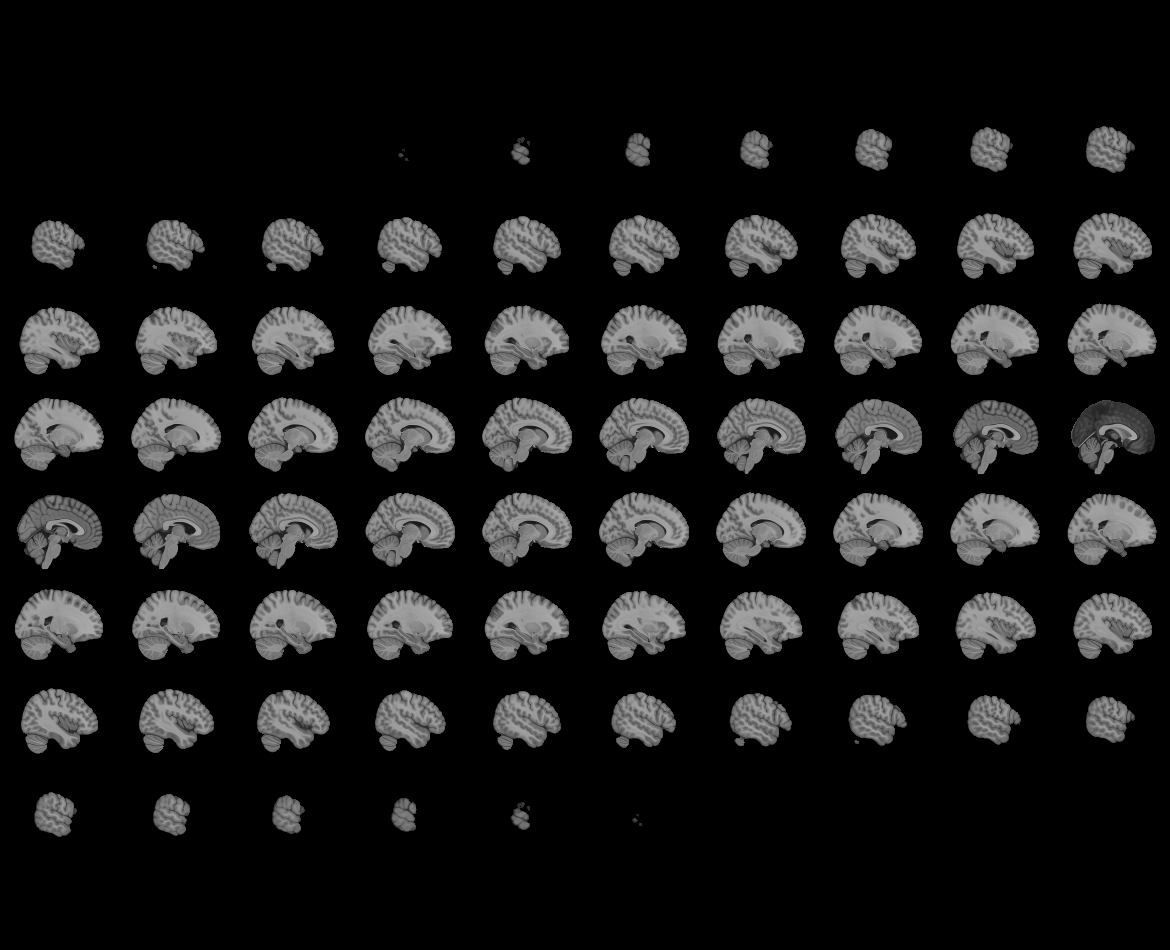
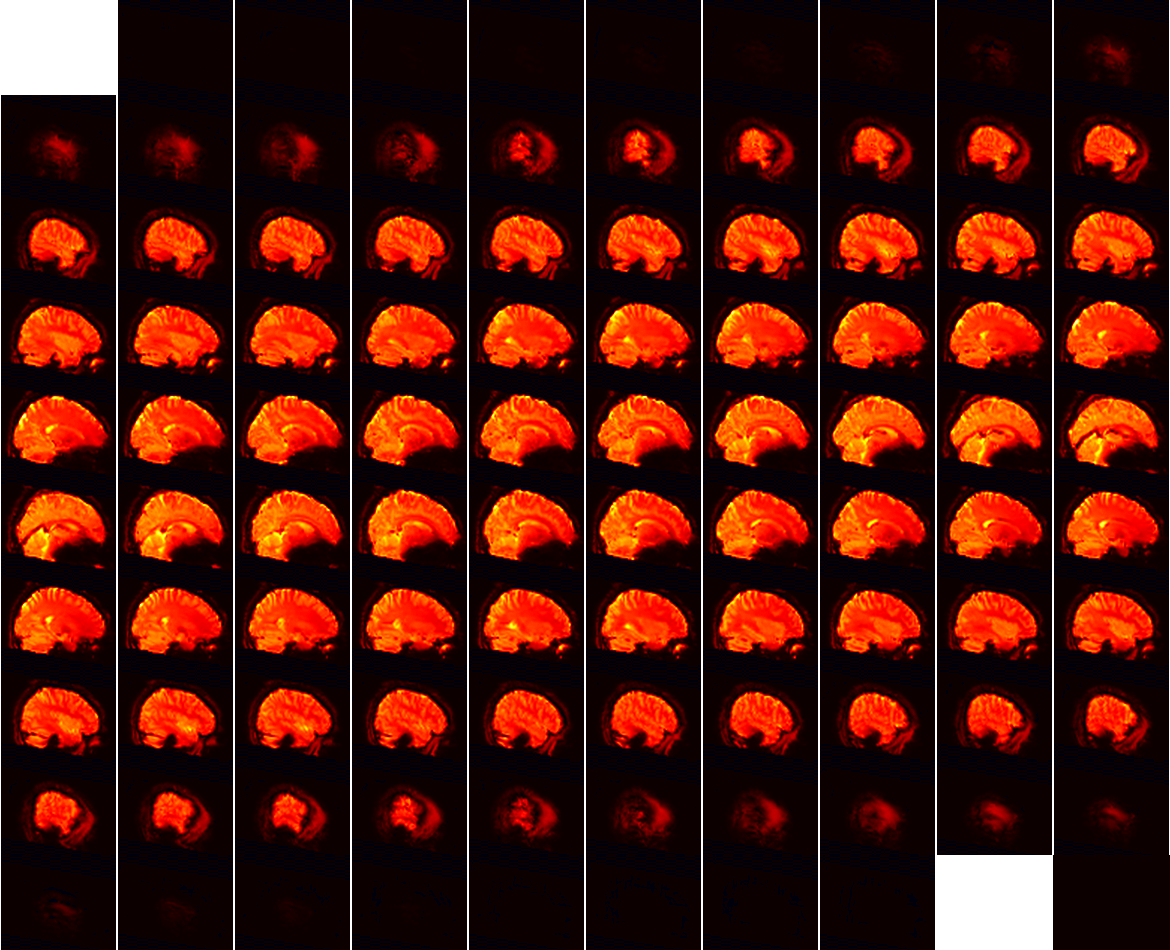

In [34]:
img= # read  image "taskstop.nii.gz" with nilear image library 
print(img.get_data().shape) #verify dimensions of teh data
mean_img= # compute average image using image library
plotting.view_img(...)  # riplanar interactive view of average image

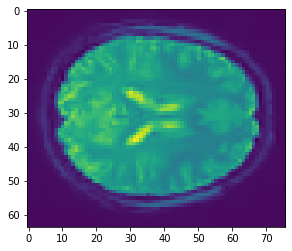

In [35]:
from matplotlib import pyplot as plt
volume=... # extract 4D array from nilear image object    
flat_slice=volume[1:,1:,30,0] #extract one slice (2D image)
... # use matplotlib imshow to plot the slice  
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


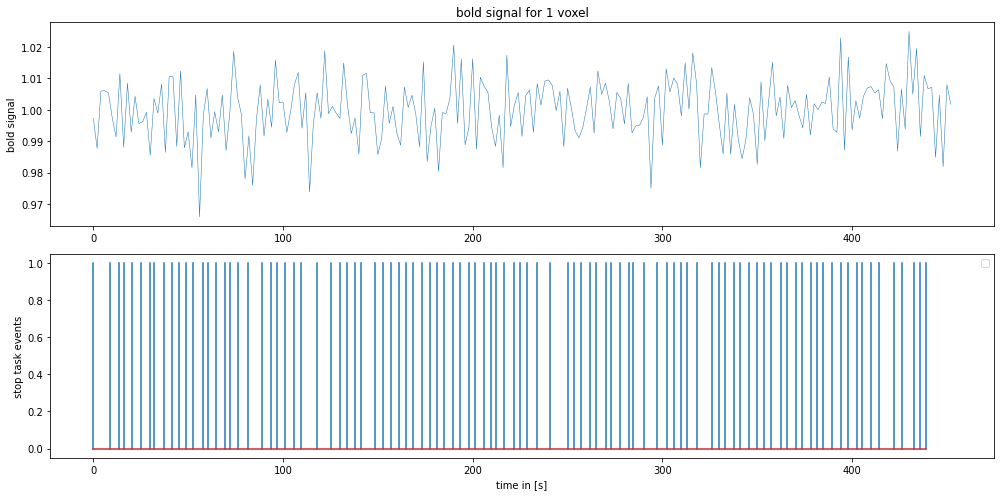

In [70]:
ts=volume[...] # extract the time serie for one voxel 
dt=... #  RT : time in sec between 2 image in [s]
time_vec=np.array ... *dt # vector of slice times in [s]  
plt.figure(figsize=(14,7))
ax1=plt.subplot(211)
plt.plot(, ts/ts.mean(), label='bold signal at'+np.array2string(np.array([30,35,30])), 
         linewidth=0.5)
plt.ylabel('bold signal')
plt.title('bold signal for 1 voxel')

plt.subplot(212,  sharex = ax1)
plt.stem(pd_events['onset'],np.ones(pd_events.shape[0]),  markerfmt='None') 
# Add title and labels
plt.ylabel('stop task events')
plt.xlabel('time in [s]')


# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 